# CENSUS INCOME

# Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

Dataset Link-

https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [63]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [64]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [65]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [66]:
df.shape

(32560, 15)

In [67]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [69]:
df.value_counts()

Age  Workclass          Fnlwgt  Education      Education_num  Marital_status       Occupation          Relationship    Race    Sex      Capital_gain  Capital_loss  Hours_per_week  Native_country  Income
25    Private           195994   1st-4th       2               Never-married        Priv-house-serv     Not-in-family   White   Female  0             0             40               Guatemala       <=50K    3
23    Private           240137   5th-6th       3               Never-married        Handlers-cleaners   Not-in-family   White   Male    0             0             55               Mexico          <=50K    2
38    Private           207202   HS-grad       9               Married-civ-spouse   Machine-op-inspct   Husband         White   Male    0             0             48               United-States   >50K     2
30    Private           144593   HS-grad       9               Never-married        Other-service       Not-in-family   Black   Male    0             0             40       

# Check for missing values

In [70]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no missing values in the data.
same can be seen through a heatmap

<Axes: >

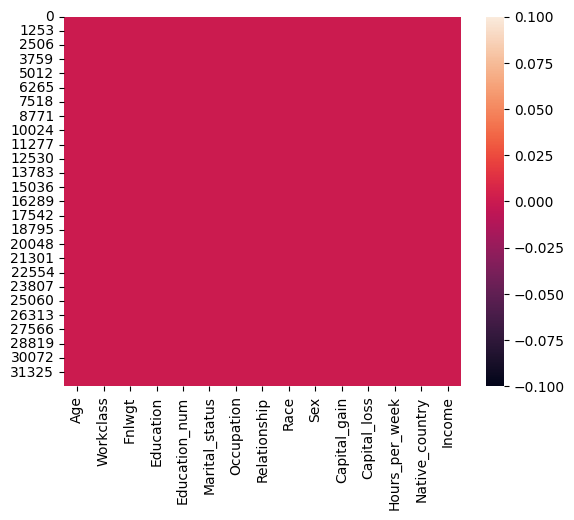

In [71]:
sns.heatmap(df.isnull())

In [72]:
# Convert all entries to strings
data = df.applymap(str)

# Count rows with "?" values
missing_count = (data == '?').any(axis=1).sum()

print(f"Number of rows with '?' values: {missing_count}")


Number of rows with '?' values: 0


# Statistical Analysis

In [73]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


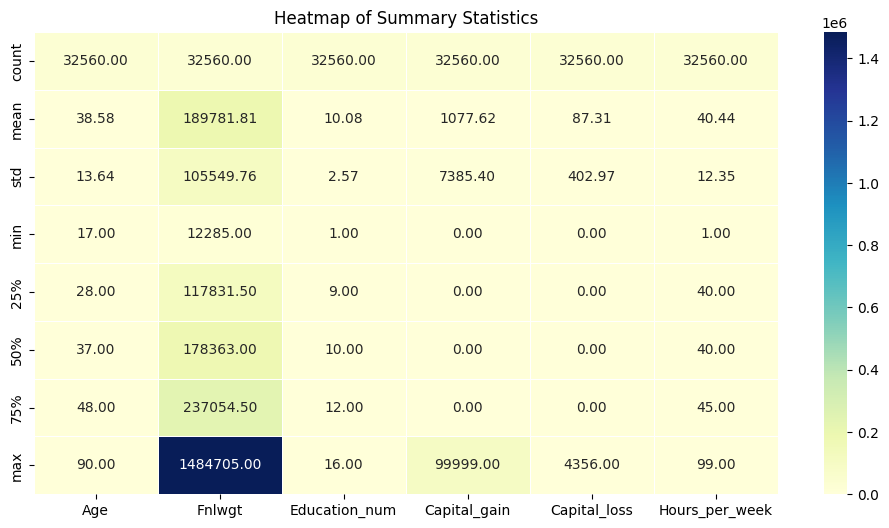

In [74]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.describe(), annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Summary Statistics')
plt.show()

# Correlation

In [156]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


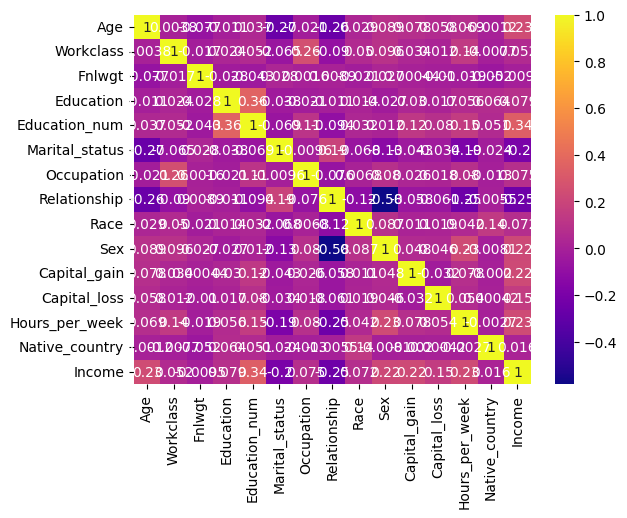

In [159]:
sns.heatmap(df.corr(), annot=True, cmap='plasma')
plt.show()


# Separating Categorical and Numerical features

In [75]:
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
categorical_columns = df.select_dtypes(include=['object'])

# Print the list of numerical and categorical columns
print("Numerical Columns:")
print(numerical_columns.columns.tolist())

print("\nCategorical Columns:")
print(categorical_columns.columns.tolist())


Numerical Columns:
['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']

Categorical Columns:
['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [76]:
df['Age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

In [77]:
# Loop through each column and print the value counts
for column in df.columns:
    value_counts = df[column].value_counts()
    print(f'Column: {column}')
    print(value_counts)
    print('\n')


Column: Age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


Column: Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


Column: Fnlwgt
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


Column: Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-

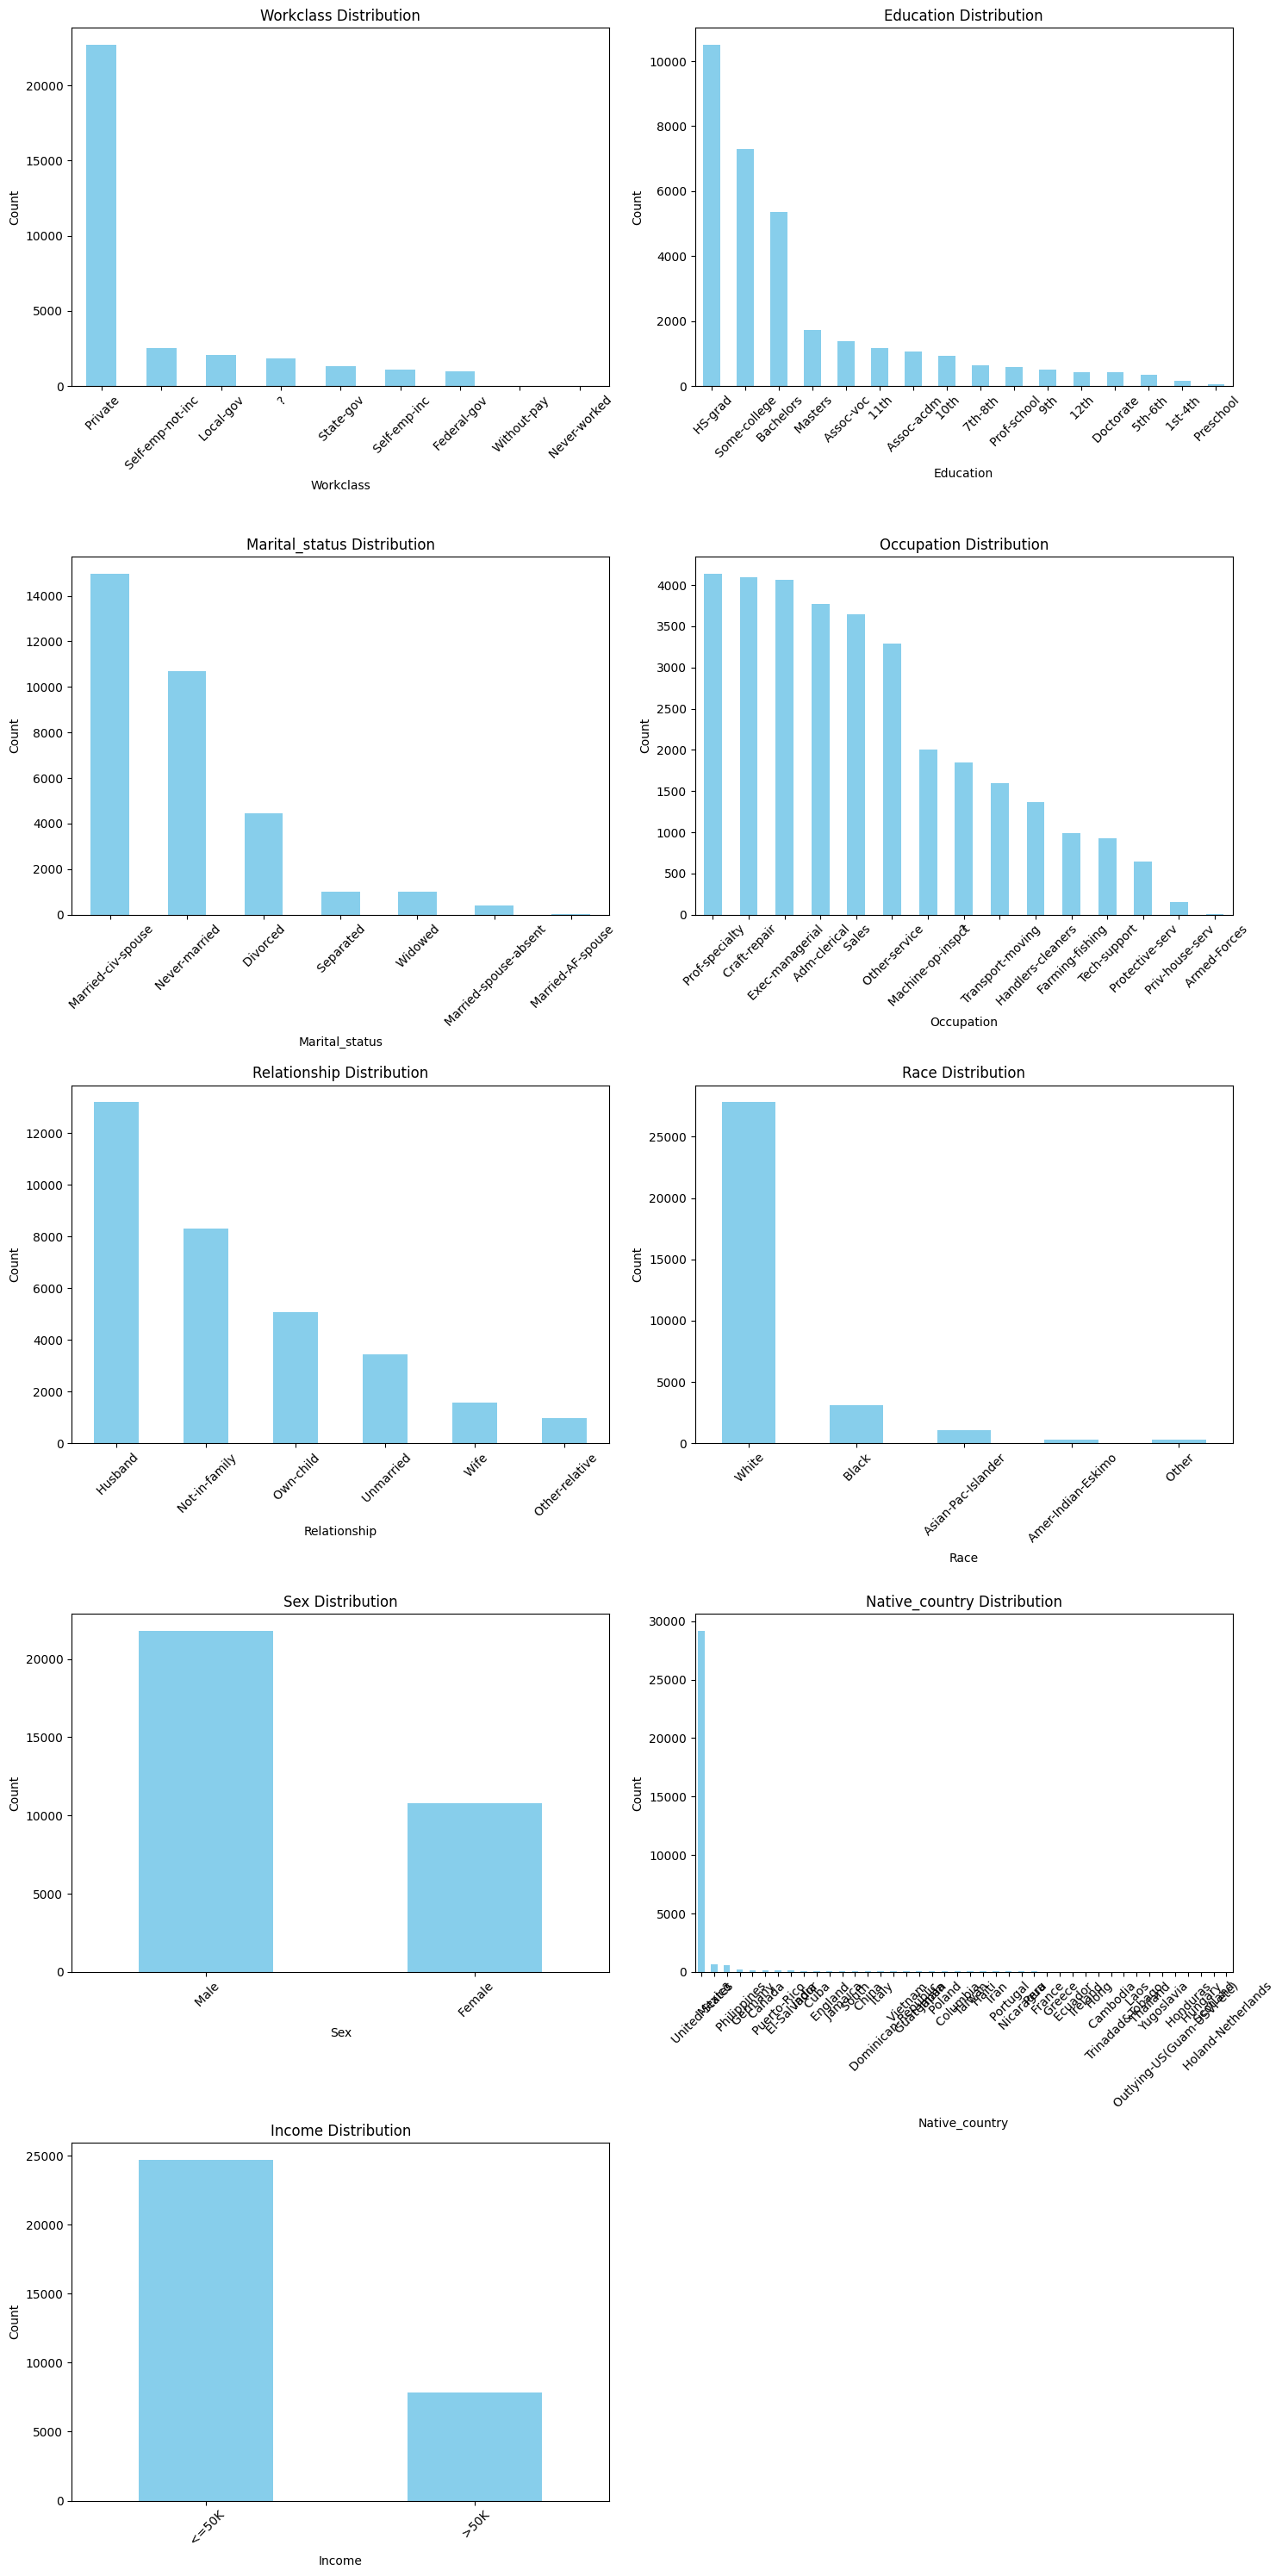

In [78]:
# List of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
num_categorical_columns = len(categorical_columns)

# Determine the subplot layout based on the number of categorical columns
num_rows = (num_categorical_columns + 1) // 2
num_cols = 2

# Create subplots for each categorical column
plt.figure(figsize=(15, 6 * num_rows))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    column_counts = df[column].value_counts()
    column_counts.plot(kind='bar', color='skyblue')
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()  # Adjust subplot spacing
plt.show()


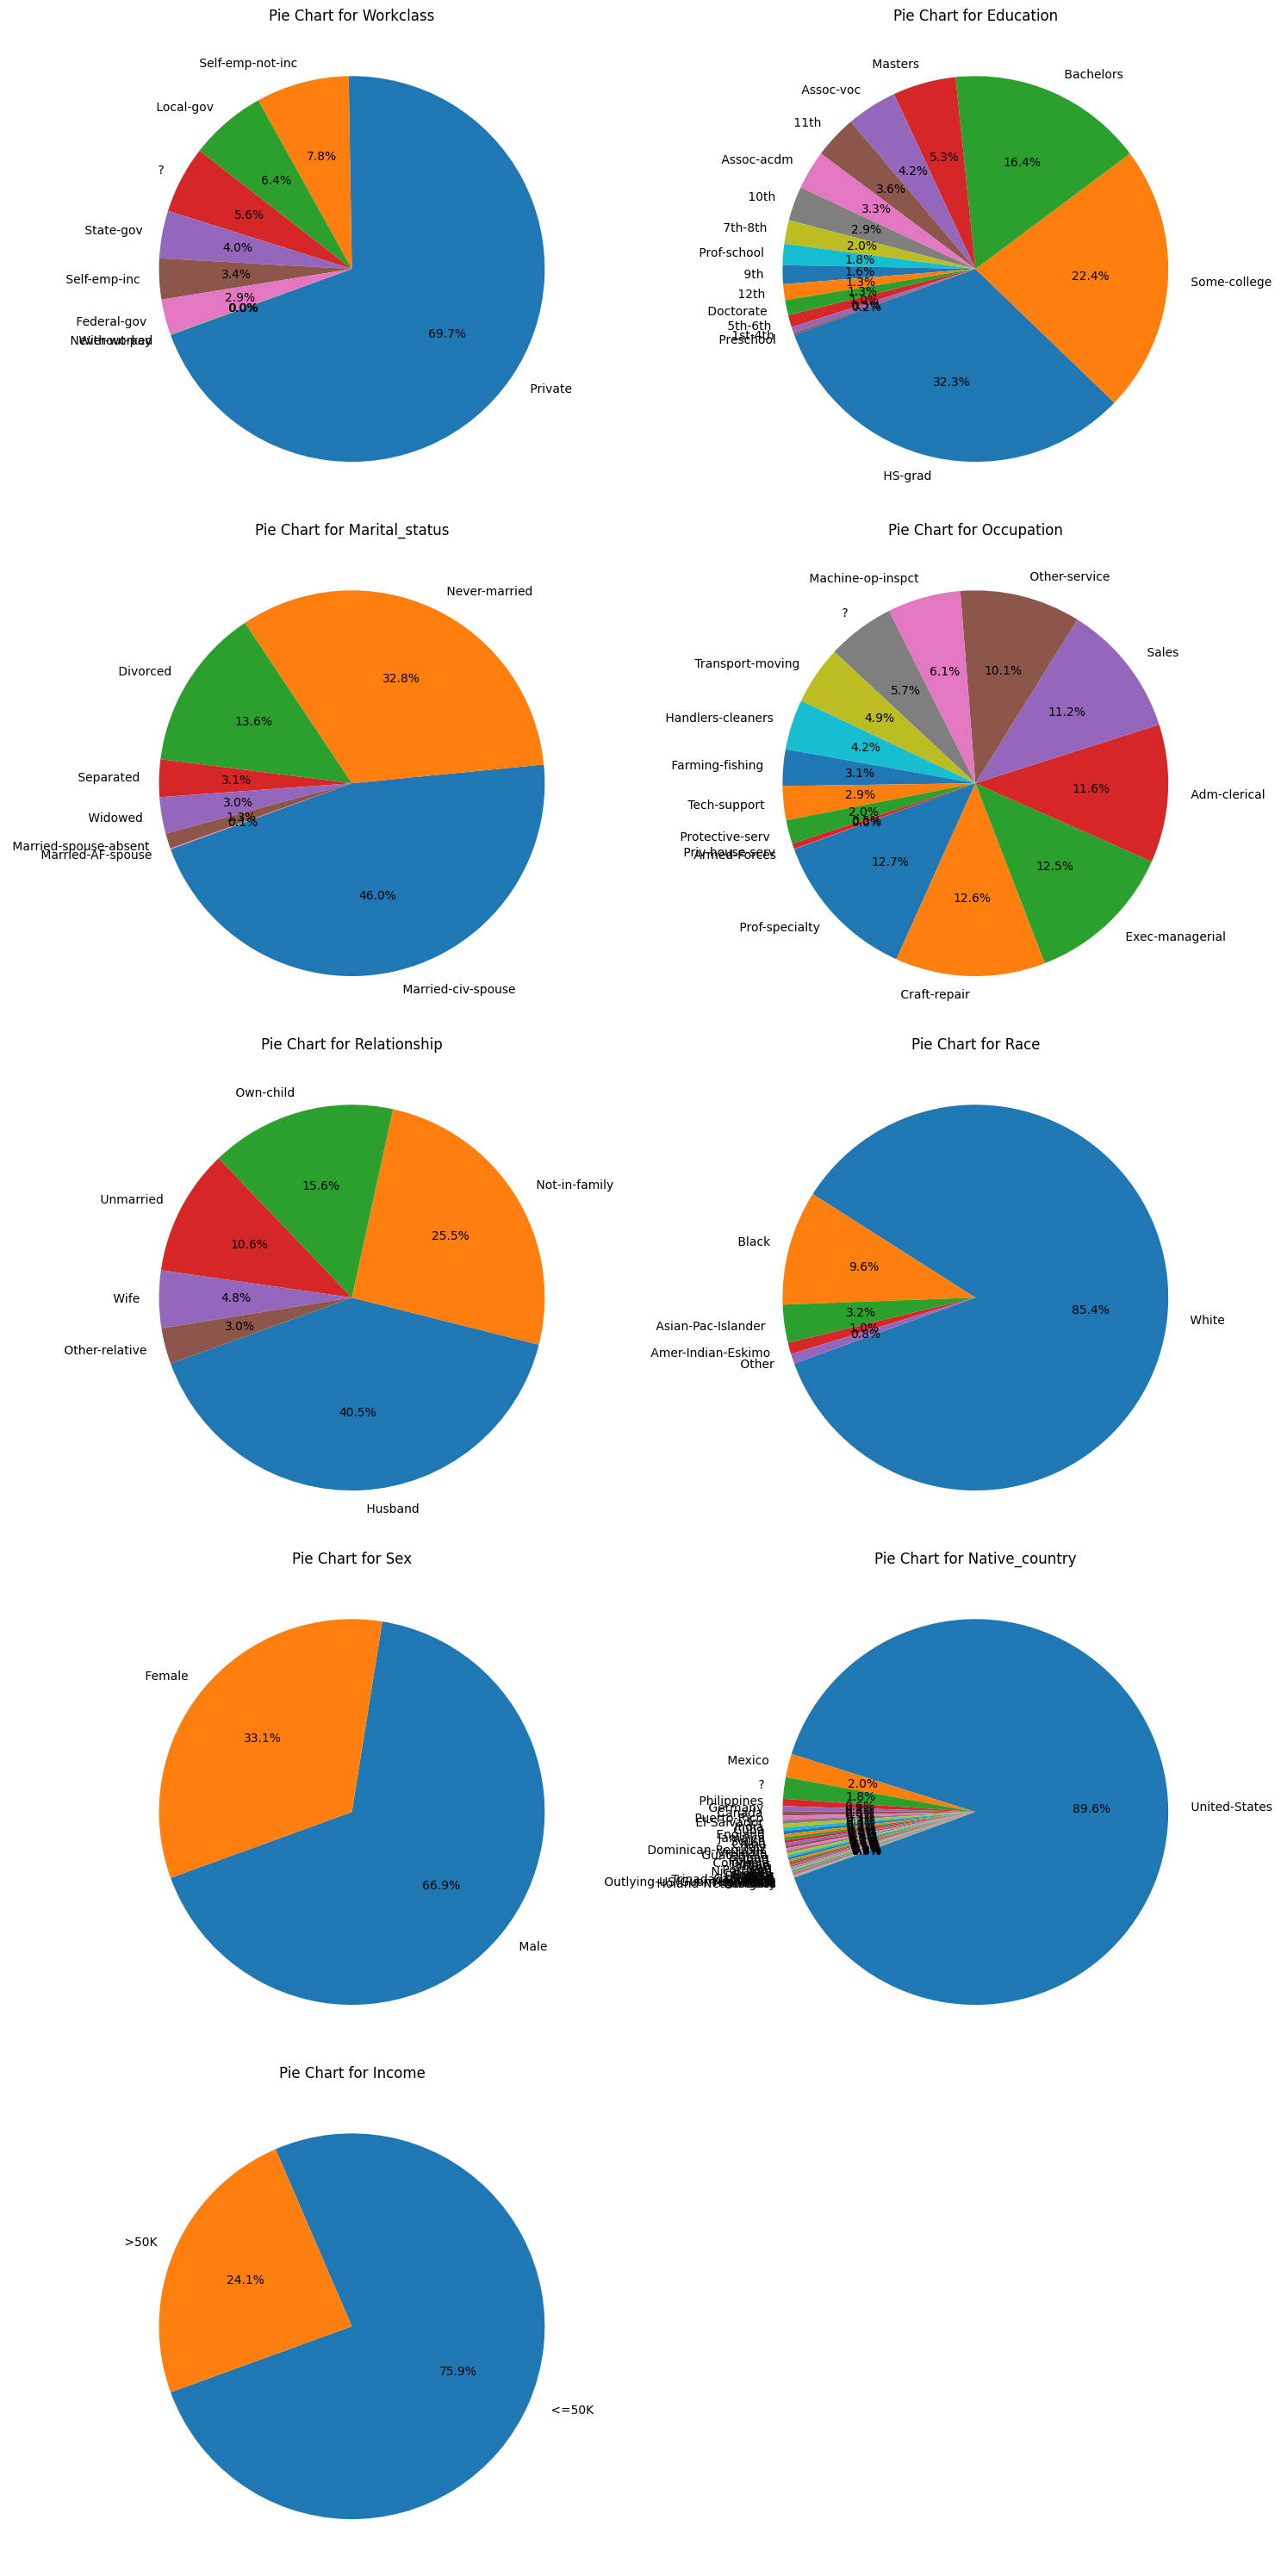

In [79]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Calculate the number of rows and columns for subplots
num_cols = 2  # Number of columns per row
num_rows = (len(categorical_columns) + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create subplots for pie charts
plt.figure(figsize=(15, 6 * num_rows))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    column_counts = df[column].value_counts()
    plt.pie(column_counts, labels=column_counts.index, autopct='%0.1f%%', startangle=200)
    plt.title(f'Pie Chart for {column}')

plt.tight_layout()
plt.show()


In [80]:
'Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week'

('Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week')

In [81]:
df['Income'] = df['Income'].map({' <=50K': 0, ' >50K': 1})

In [82]:
df['Income'].value_counts()

0    24719
1     7841
Name: Income, dtype: int64

<Figure size 1000x600 with 0 Axes>

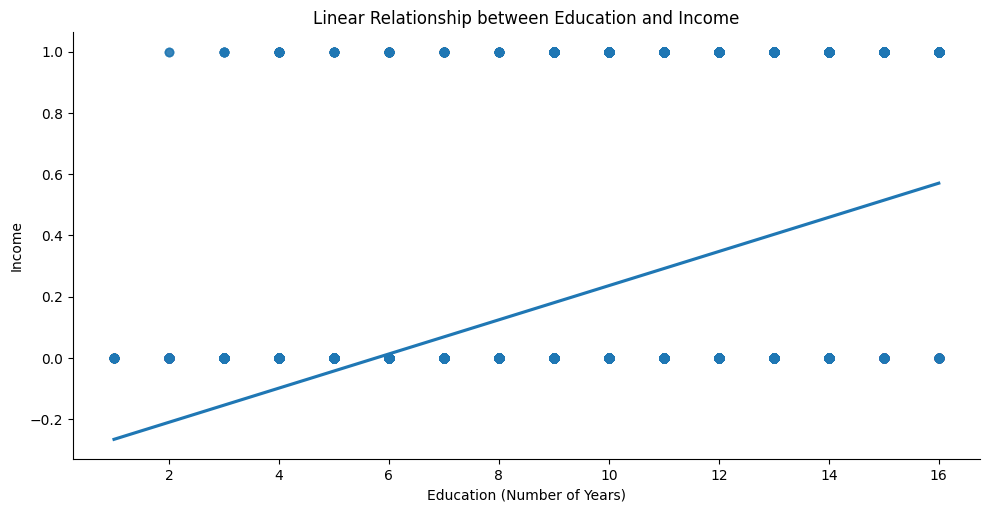

In [83]:
# Create an lmplot to visualize a linear relationship between 'Education_num' and 'Income'
plt.figure(figsize=(10, 6))
sns.lmplot(x='Education_num', y='Income', data=df, ci=None, aspect=2, scatter_kws={"alpha": 0.3})
plt.title('Linear Relationship between Education and Income')
plt.xlabel('Education (Number of Years)')
plt.ylabel('Income')
plt.show()


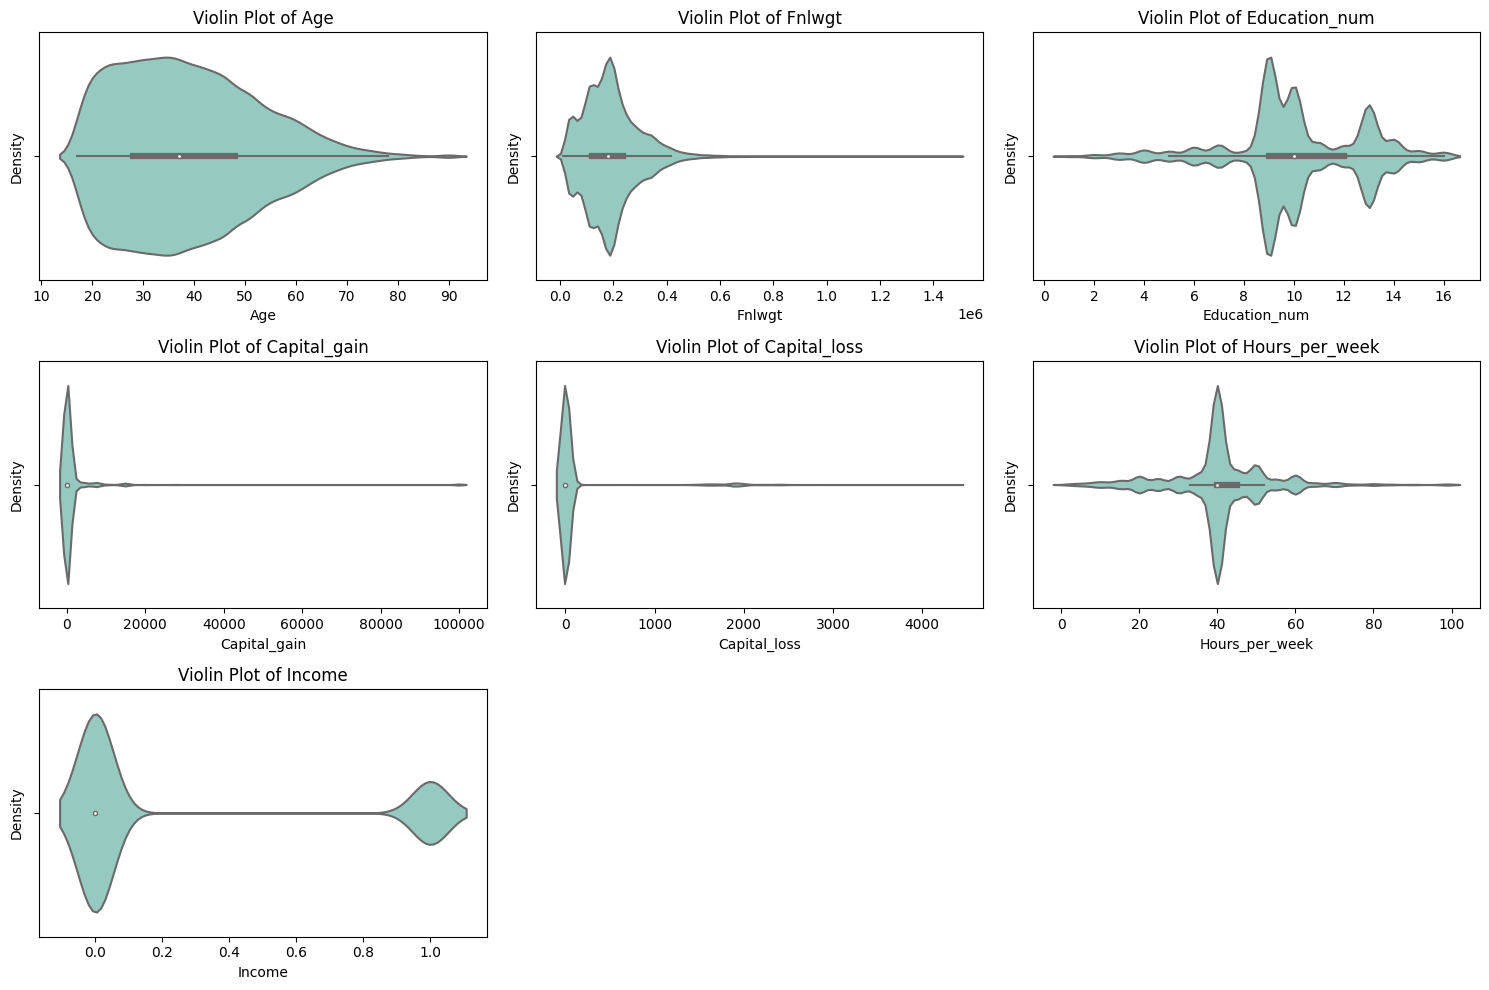

In [84]:
# Select only the numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Create violin plots for all numerical variables
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns.columns, 1):
    plt.subplot(3, 3, i)
    sns.violinplot(x=column, data=df, inner='box', palette='Set3')
    plt.title(f'Violin Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


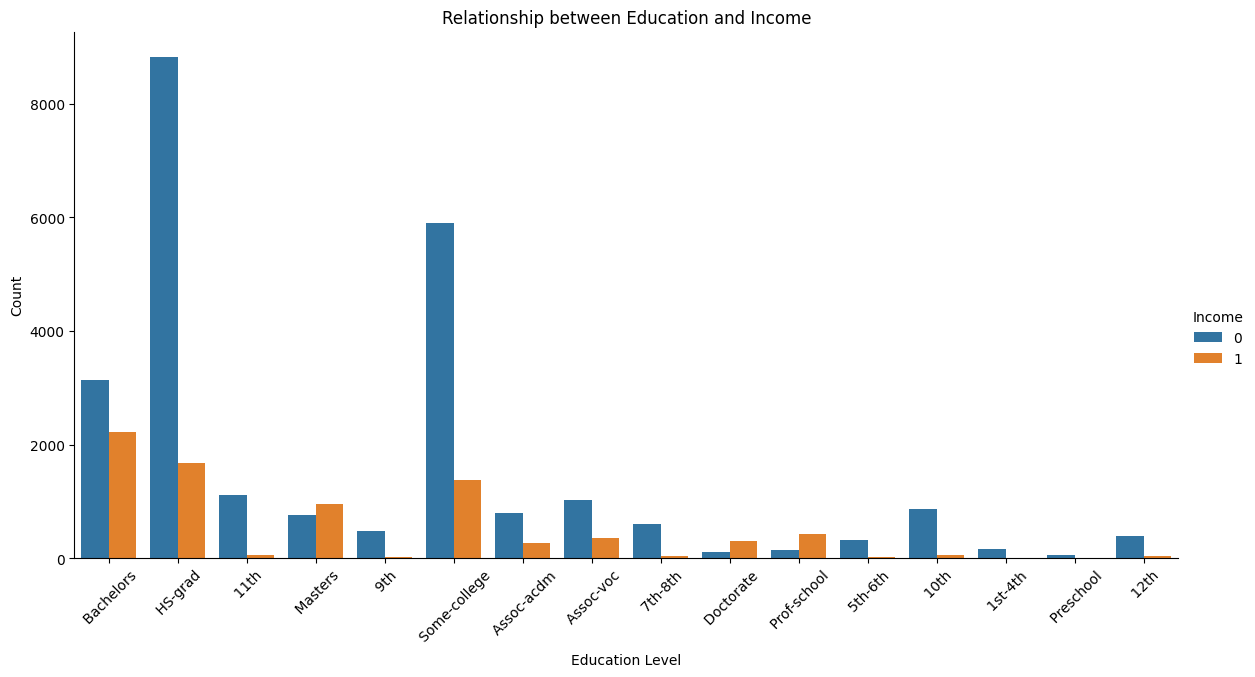

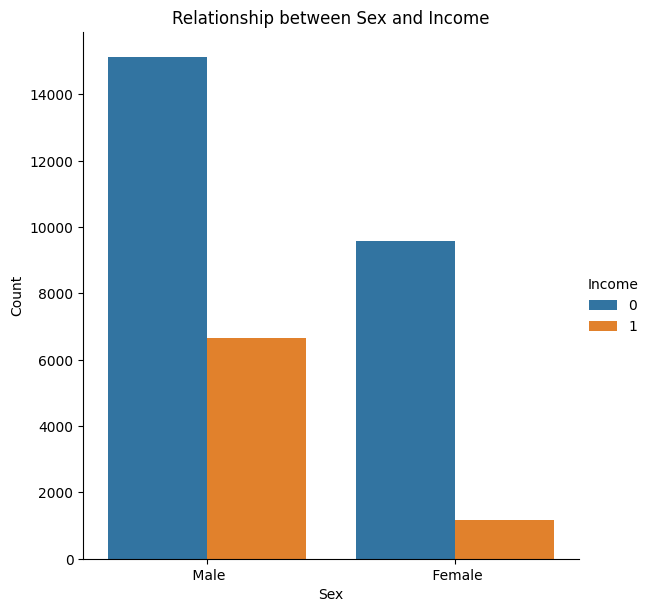

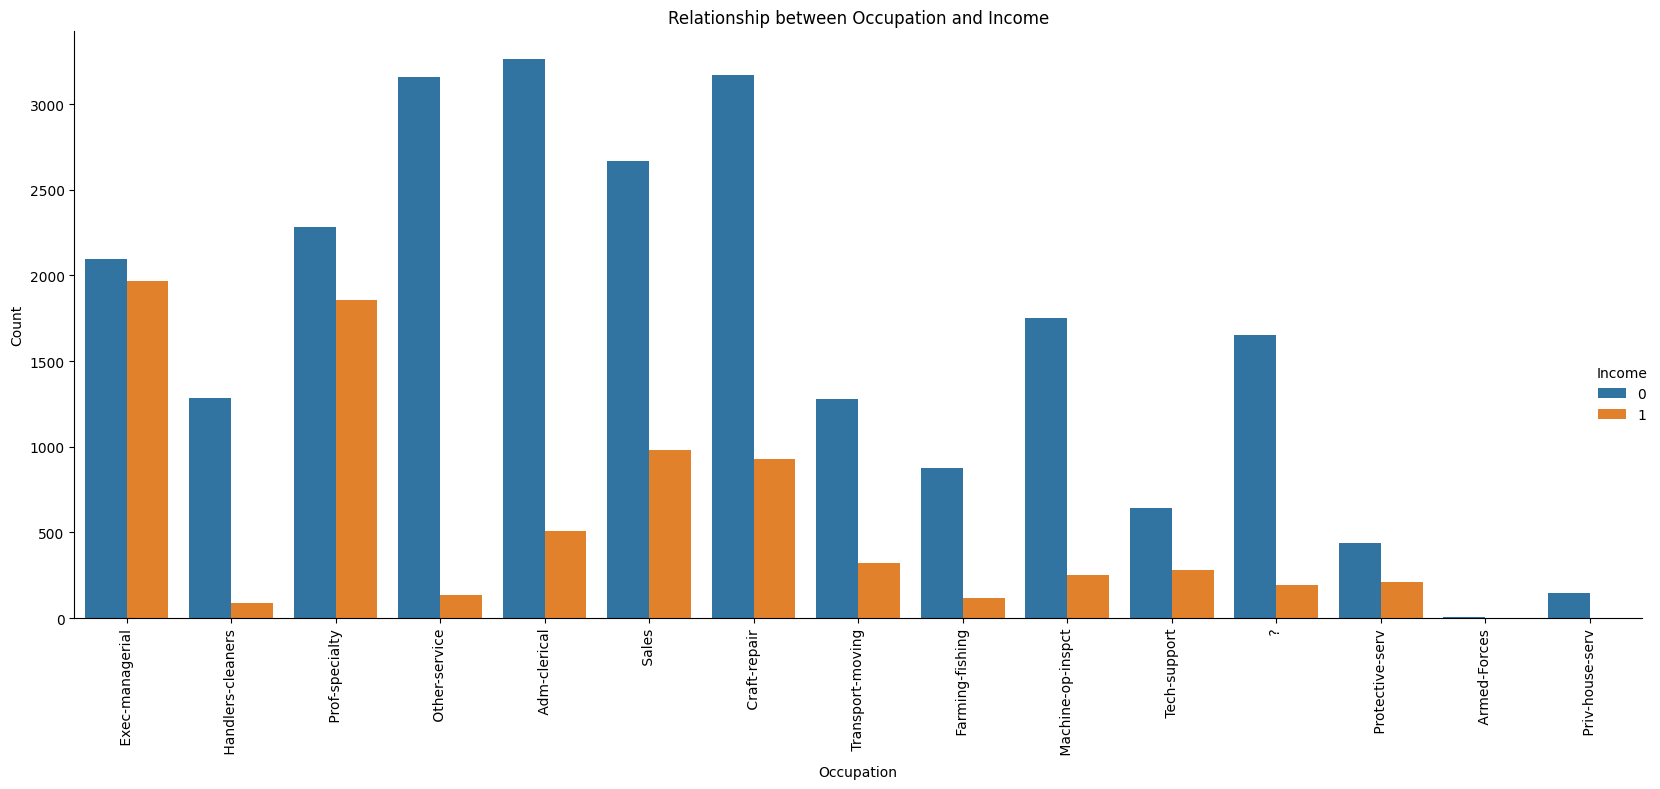

In [85]:
#Catplot for the relationship between 'Education' and 'Income'
sns.catplot(x='Education', hue='Income', data=df, kind='count', height=6, aspect=2)
plt.title('Relationship between Education and Income')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)

#Catplot for the relationship between 'Sex' and 'Income'
sns.catplot(x='Sex', hue='Income', data=df, kind='count', height=6, aspect=1)
plt.title('Relationship between Sex and Income')
plt.xlabel('Sex')
plt.ylabel('Count')

# Catplot for the relationship between 'Occupation' and 'Income'
sns.catplot(x='Occupation', hue='Income', data=df, kind='count', height=8, aspect=2)
plt.title('Relationship between Occupation and Income')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


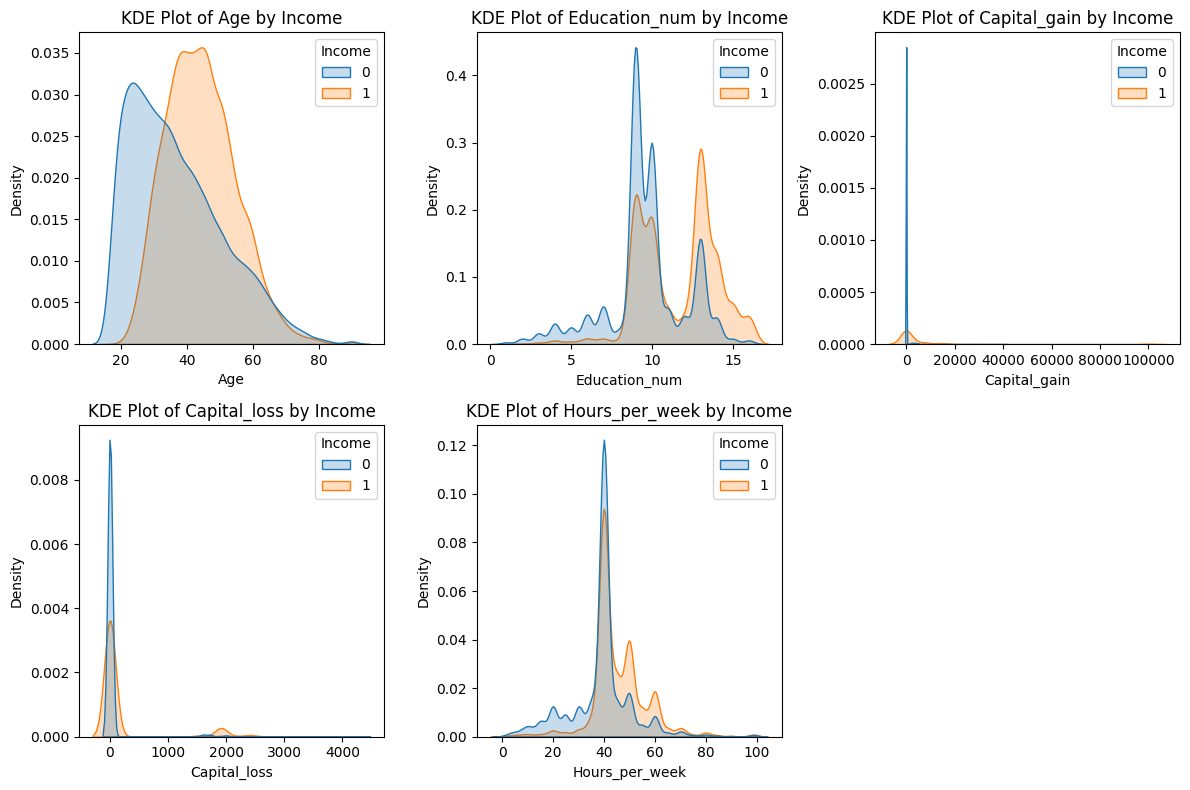

In [86]:
# Select numerical columns for KDE plots
numerical_columns = ['Age', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']

# Create KDE plots for each numerical variable
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(data=df, x=column, hue='Income', fill=True, common_norm=False)
    plt.title(f'KDE Plot of {column} by Income')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


<Axes: >

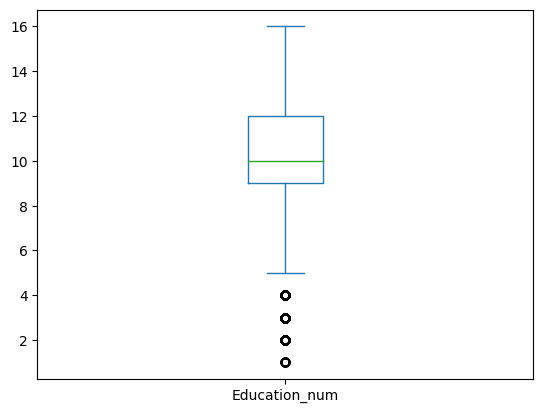

In [87]:
df['Education_num'].plot.box()

<Axes: >

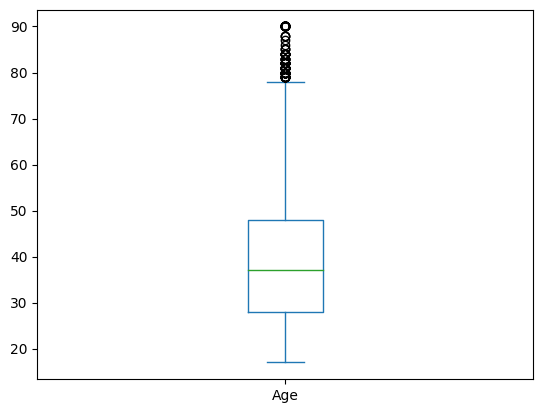

In [88]:
df['Age'].plot.box()

<Axes: >

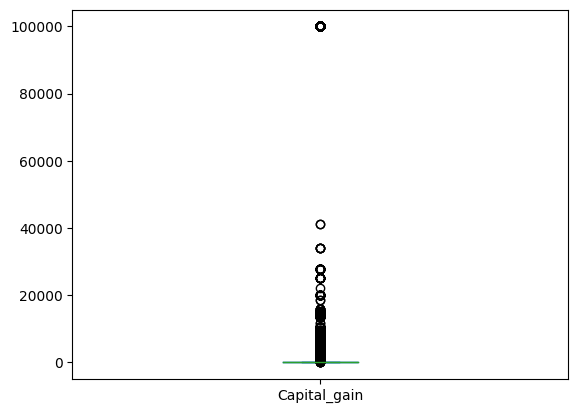

In [89]:
df['Capital_gain'].plot.box()

<Axes: >

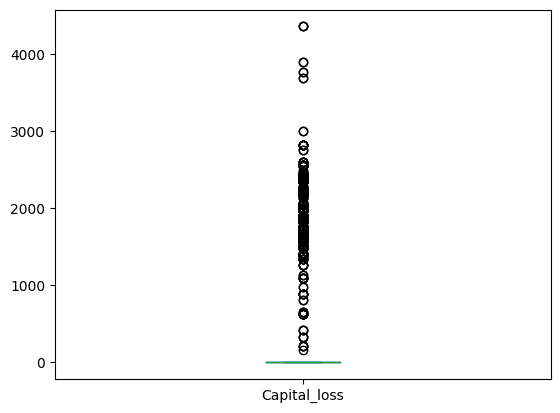

In [90]:
df['Capital_loss'].plot.box()

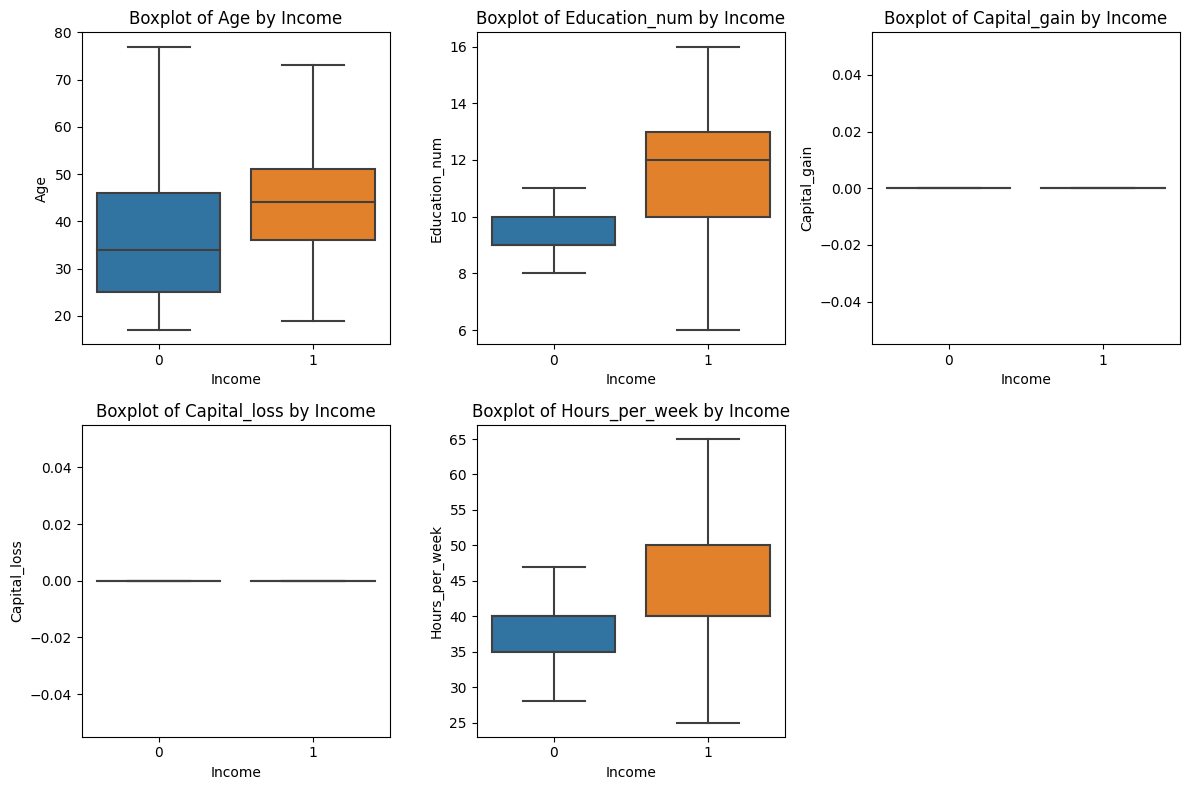

In [91]:
# Select numerical columns for boxplots
numerical_columns = ['Age', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']

# Create boxplots for each numerical variable
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Income', y=column, data=df, showfliers=False)
    plt.title(f'Boxplot of {column} by Income')
    plt.xlabel('Income')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


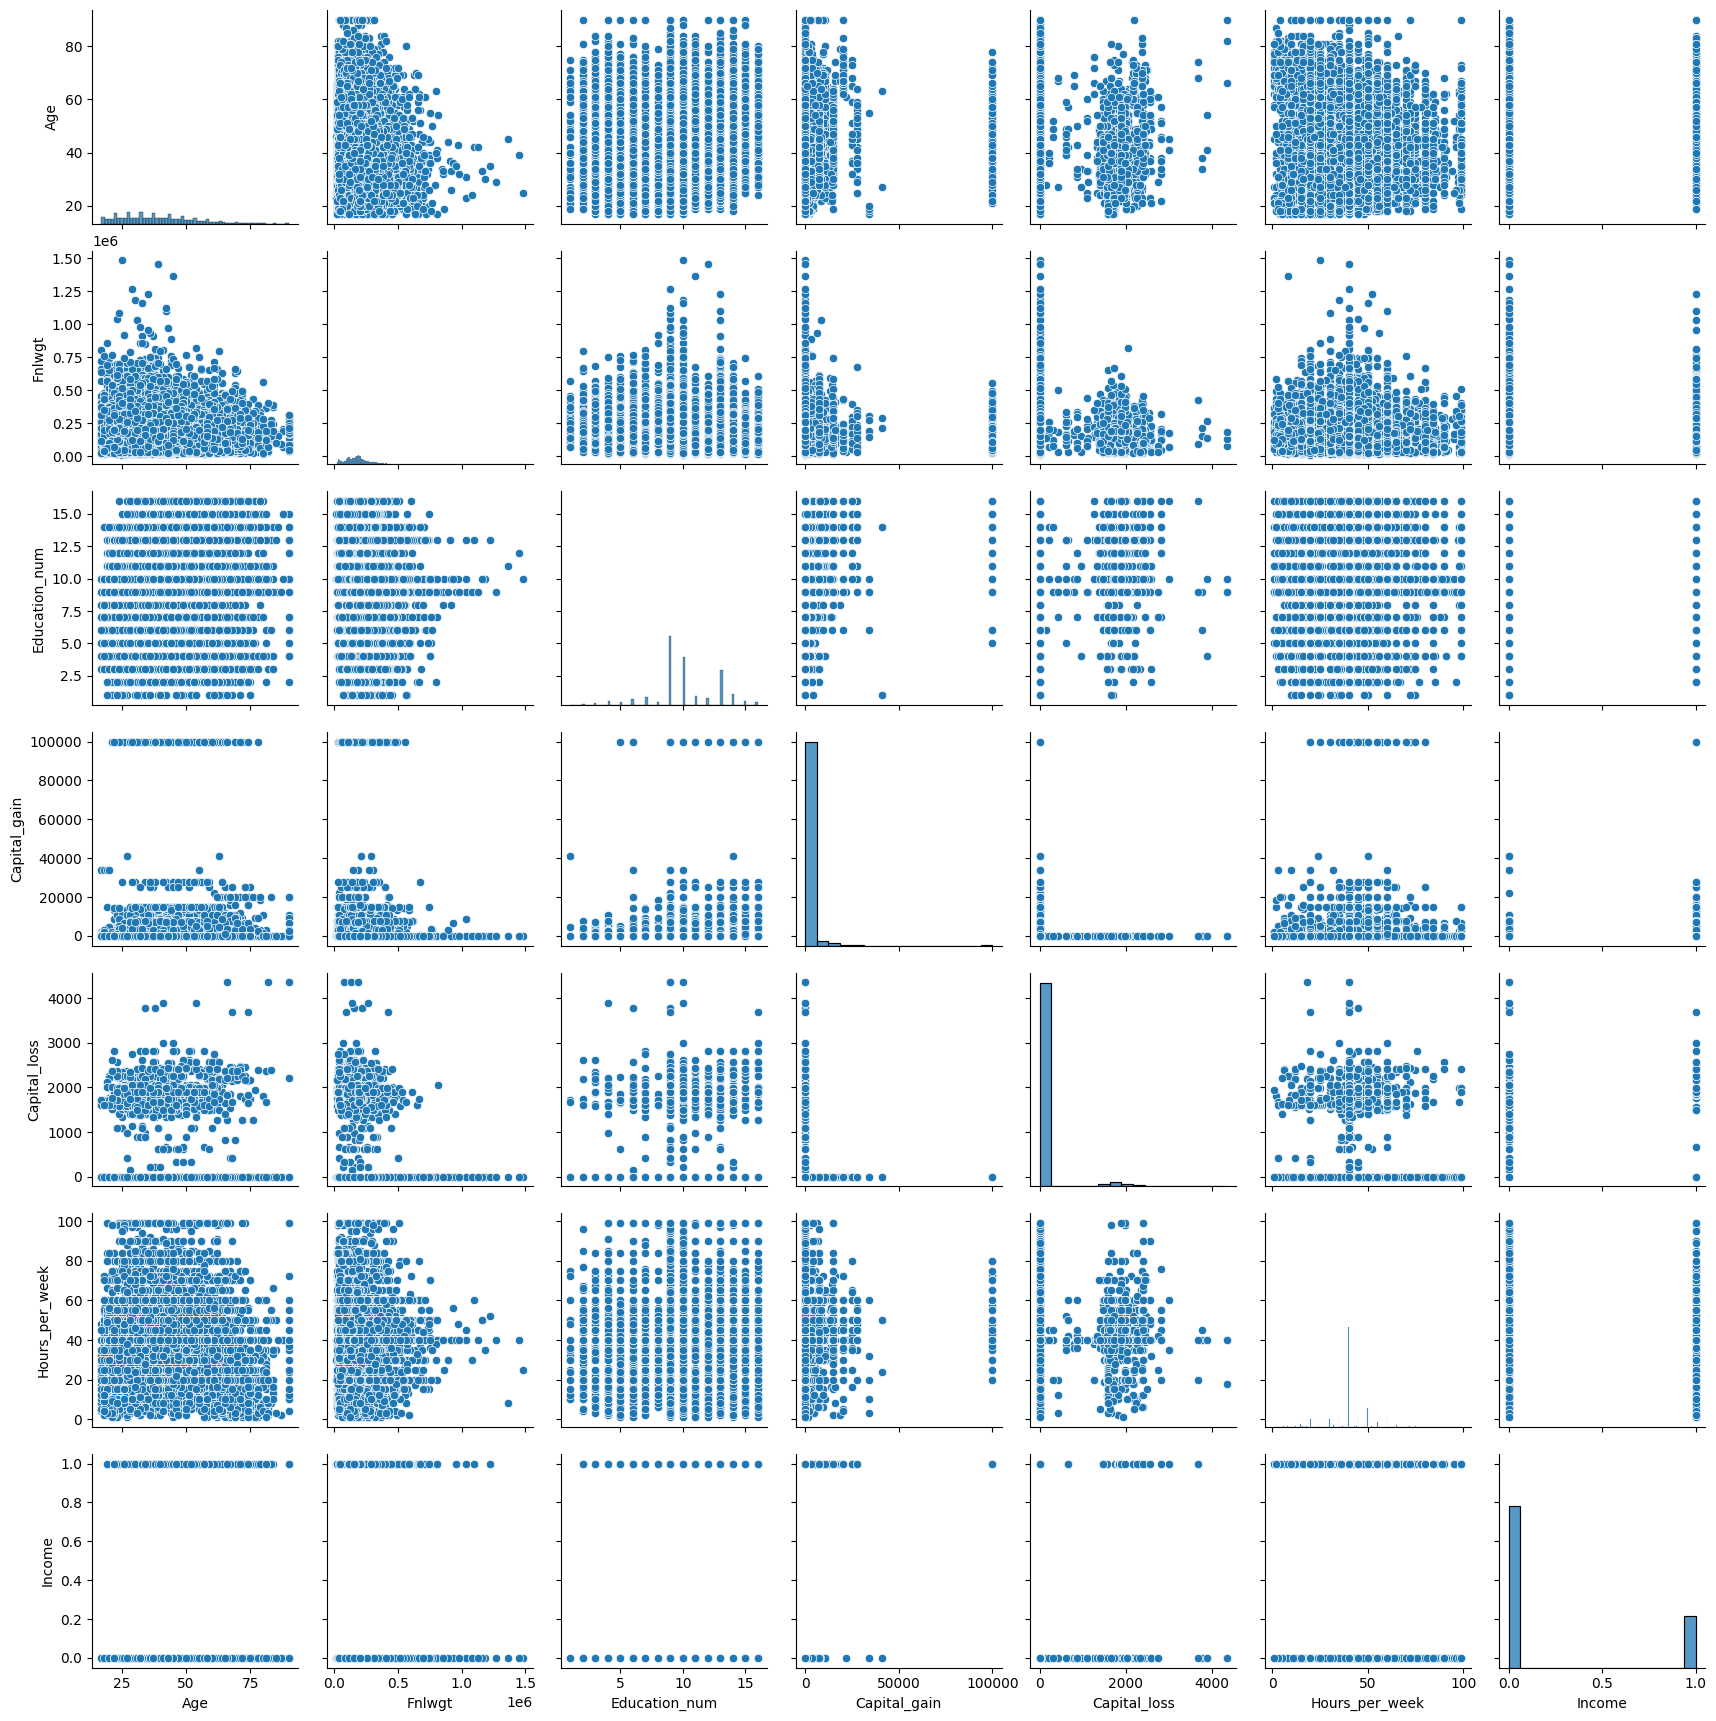

In [92]:
sns.pairplot(df)

In [93]:
df.shape

(32560, 15)

# Encoding

In [94]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [95]:
X = df.drop('Income', axis=1)
Y = df['Income']

In [96]:
X = X.drop(['Workclass', 'Education', 'Race', 'Sex',
            'Capital_loss', 'Native_country'], axis=1)

In [97]:
from sklearn.preprocessing import StandardScaler
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

In [98]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'


0    75.92 %
1    24.08 %
Name: Income, dtype: object

In [99]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [100]:
ros.fit(X, Y)


RandomOverSampler(random_state=42)

In [101]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)


In [102]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'


0    50.0 %
1    50.0 %
Name: Income, dtype: object

# Modelling

In [133]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [105]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (39550, 8)
X_test shape: (9888, 8)
Y_train shape: (39550,)
Y_test shape: (9888,)


# Logistic Regression

In [106]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)

# Prediction
predlr = lr.predict(X_test)

print(accuracy_score(Y_test, predlr))
print(confusion_matrix(Y_test, predlr))
print(classification_report(Y_test,predlr))

0.7605177993527508
[[3756 1187]
 [1181 3764]]
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      4943
           1       0.76      0.76      0.76      4945

    accuracy                           0.76      9888
   macro avg       0.76      0.76      0.76      9888
weighted avg       0.76      0.76      0.76      9888



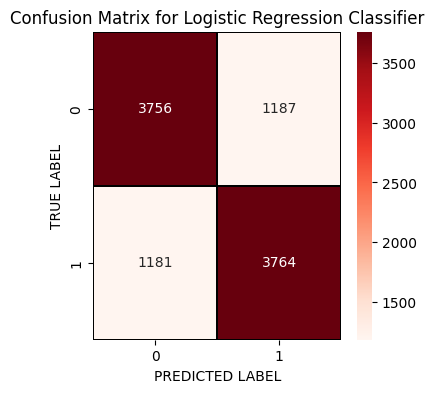

In [107]:
# Lets plot confusion matrix for Logistic Regression
cm = confusion_matrix(Y_test,predlr)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot = True,linewidths=.1, linecolor="black", fmt = ".0f", ax=ax, cmap="Reds",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

# Random Forest Classifier

In [108]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

# Prediction
predrf = rf.predict(X_test)

print(accuracy_score(Y_test, predrf))
print(confusion_matrix(Y_test, predrf))
print(classification_report(Y_test,predrf))

0.9248584142394822
[[4315  628]
 [ 115 4830]]
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      4943
           1       0.88      0.98      0.93      4945

    accuracy                           0.92      9888
   macro avg       0.93      0.92      0.92      9888
weighted avg       0.93      0.92      0.92      9888



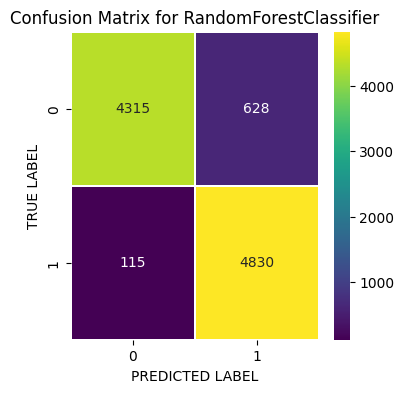

In [109]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(Y_test,predrf)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="white", fmt = ".0f", ax=ax, cmap="viridis",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

# KNeighbors Classifier

In [110]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
print(accuracy_score(Y_test,Y_pred_knn ))
print(confusion_matrix(Y_test,Y_pred_knn))
print(classification_report(Y_test,Y_pred_knn))

0.8360639158576052
[[3805 1138]
 [ 483 4462]]
              precision    recall  f1-score   support

           0       0.89      0.77      0.82      4943
           1       0.80      0.90      0.85      4945

    accuracy                           0.84      9888
   macro avg       0.84      0.84      0.84      9888
weighted avg       0.84      0.84      0.84      9888



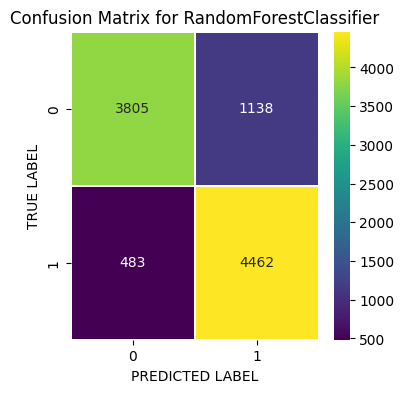

In [111]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(Y_test,Y_pred_knn)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="white", fmt = ".0f", ax=ax, cmap="viridis",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

# Support vector Classifier

In [112]:
from sklearn.svm import SVC
svc = SVC(random_state=42)
svc.fit(X_train, Y_train)
Y_pred_svc = svc.predict(X_test)
print(accuracy_score(Y_test,Y_pred_svc))
print(confusion_matrix(Y_test,Y_pred_svc))
print(classification_report(Y_test,Y_pred_svc))

0.8198826860841424
[[3731 1212]
 [ 569 4376]]
              precision    recall  f1-score   support

           0       0.87      0.75      0.81      4943
           1       0.78      0.88      0.83      4945

    accuracy                           0.82      9888
   macro avg       0.83      0.82      0.82      9888
weighted avg       0.83      0.82      0.82      9888



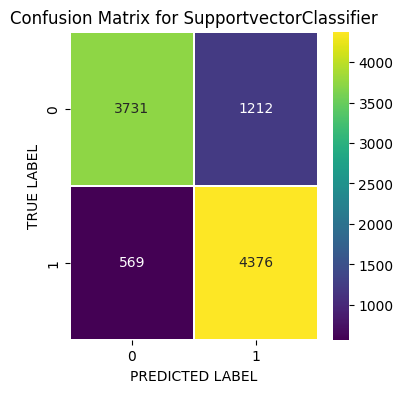

In [113]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(Y_test,Y_pred_svc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="white", fmt = ".0f", ax=ax, cmap="viridis",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SupportvectorClassifier')
plt.show()

# Naive Bayes Classifier

In [114]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)
Y_pred_nb = nb.predict(X_test)
print(accuracy_score(Y_test,Y_pred_nb))
print(confusion_matrix(Y_test,Y_pred_nb))
print(classification_report(Y_test,Y_pred_nb))

0.662621359223301
[[4743  200]
 [3136 1809]]
              precision    recall  f1-score   support

           0       0.60      0.96      0.74      4943
           1       0.90      0.37      0.52      4945

    accuracy                           0.66      9888
   macro avg       0.75      0.66      0.63      9888
weighted avg       0.75      0.66      0.63      9888



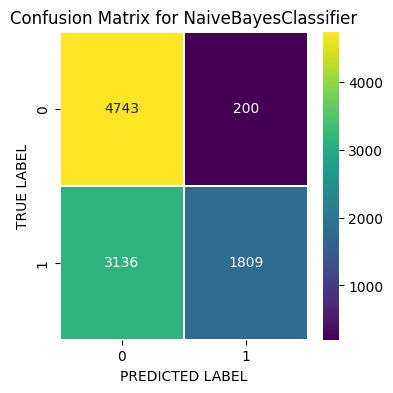

In [115]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(Y_test,Y_pred_nb)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="white", fmt = ".0f", ax=ax, cmap="viridis",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for NaiveBayesClassifier')
plt.show()

# Decision Tree classifier

In [138]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, Y_train)
Y_pred_dt = dt.predict(X_test)
print(accuracy_score(Y_test, Y_pred_dt))
print(confusion_matrix(Y_test, Y_pred_dt))
print(classification_report(Y_test,Y_pred_dt))

0.9128236245954693
[[4230  713]
 [ 149 4796]]
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      4943
           1       0.87      0.97      0.92      4945

    accuracy                           0.91      9888
   macro avg       0.92      0.91      0.91      9888
weighted avg       0.92      0.91      0.91      9888



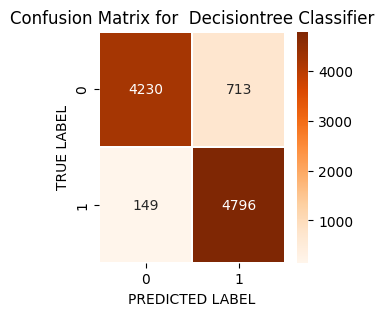

In [139]:
# Lets plot confusion matrix for  AdaBoost Classifier
cm = confusion_matrix(Y_test,Y_pred_dt)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="white", fmt = ".0f", ax=ax, cmap="Oranges",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Decisiontree Classifier')
plt.show()

# AdaBoost Classifier

In [ ]:
# Checking accuracy for AdaBoost Classifier
abc = AdaBoostClassifier()
abc.fit(X_train,Y_train)

# Prediction
predabc = abc.predict(X_test)

print(accuracy_score(Y_test, predabc))
print(confusion_matrix(Y_test, predabc))
print(classification_report(Y_test,predabc))

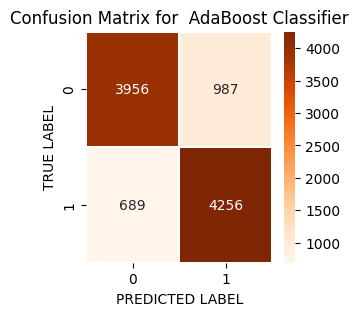

In [126]:
# Lets plot confusion matrix for  AdaBoost Classifier
cm = confusion_matrix(Y_test,predabc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="white", fmt = ".0f", ax=ax, cmap="Oranges",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  AdaBoost Classifier')
plt.show()

# Gradient Boosting Classifier

In [127]:
gb = GradientBoostingClassifier()
gb.fit(X_train,Y_train)

# Prediction
predgb = gb.predict(X_test)

print(accuracy_score(Y_test, predgb))
print(confusion_matrix(Y_test, predgb))
print(classification_report(Y_test,predgb))

0.8355582524271845
[[3965  978]
 [ 648 4297]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      4943
           1       0.81      0.87      0.84      4945

    accuracy                           0.84      9888
   macro avg       0.84      0.84      0.84      9888
weighted avg       0.84      0.84      0.84      9888



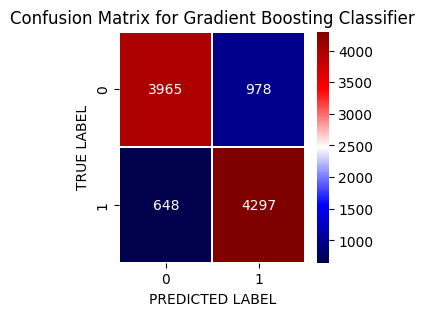

In [128]:
# Lets plot confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(Y_test,predgb)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="white", fmt = ".0f", ax=ax, cmap="seismic",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

# Extra Trees Classifier

In [129]:
# Checking accuracy for ExtraTreesClassifier
xtc = ExtraTreesClassifier()
xtc.fit(X_train,Y_train)

# Prediction
predxtc = xtc.predict(X_test)

print(accuracy_score(Y_test, predxtc))
print(confusion_matrix(Y_test, predxtc))
print(classification_report(Y_test,predxtc))

0.93042071197411
[[4400  543]
 [ 145 4800]]
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      4943
           1       0.90      0.97      0.93      4945

    accuracy                           0.93      9888
   macro avg       0.93      0.93      0.93      9888
weighted avg       0.93      0.93      0.93      9888



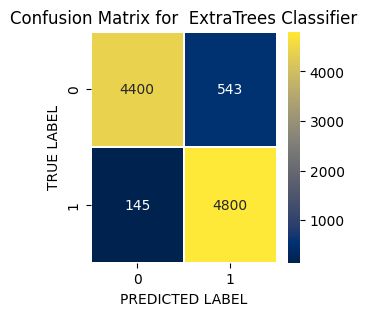

In [130]:
# Lets plot confusion matrix for  ExtraTreesClassifier
cm = confusion_matrix(Y_test,predxtc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="white", fmt = ".0f", ax=ax, cmap="cividis",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  ExtraTrees Classifier')
plt.show()

# XGB Classifier

In [134]:
# Checking accuracy for XGBClassifier
xgb = xgb(verbosity=0)
xgb.fit(X_train,Y_train)

# Prediction
predxgb = xgb.predict(X_test)

print(accuracy_score(Y_test, predxgb))
print(confusion_matrix(Y_test, predxgb))
print(classification_report(Y_test,predxgb))

0.861549352750809
[[4044  899]
 [ 470 4475]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      4943
           1       0.83      0.90      0.87      4945

    accuracy                           0.86      9888
   macro avg       0.86      0.86      0.86      9888
weighted avg       0.86      0.86      0.86      9888



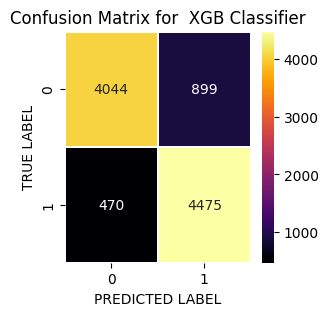

In [135]:
# Lets plot confusion matrix for  XGBClassifier
cm = confusion_matrix(Y_test,predxgb)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="white", fmt = ".0f", ax=ax, cmap="inferno",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  XGB Classifier')
plt.show()

# Cross validation

In [141]:
# cv score for Logistic Regression
print('Logistic Regression:',cross_val_score(lr,X,Y,cv=5).mean())

# cv score for Random Forest Classifier
print('Random Forest Classifier:',cross_val_score(rf,X,Y,cv=5).mean())

# cv score for AdaBoosting Classifier
print('AdaBoosting Classifier:',cross_val_score(abc,X,Y,cv=5).mean())

# cv score for Gradient Boosting Classifier
print('Gradient Boosting Classifier:',cross_val_score(gb,X,Y,cv=5).mean())

# cv score for XGB Classifier
print('XGB Classifier:',cross_val_score(xgb,X,Y,cv=5).mean())

# cv score for Extra Trees Classifier
print('Extra Trees Classifier:',cross_val_score(xtc,X,Y,cv=10).mean())

# cv score for KNeighbors Classifier
print('KNeighbors Classifier:',cross_val_score(knn,X,Y,cv=5).mean())

# cv score for naive bayes Classifier
print('naive Bayes Classifier:',cross_val_score(nb,X,Y,cv=5).mean())


# cv score for Decision Tree Classifier
print('Decision Tree Classifier:',cross_val_score(dt,X,Y,cv=5).mean())

# cv score for support vector Classifier
print('Support vector Classifier:',cross_val_score(svc,X,Y,cv=5).mean())

Logistic Regression: 0.8196560196560198
Random Forest Classifier: 0.8449324324324324
AdaBoosting Classifier: 0.8530098280098282
Gradient Boosting Classifier: 0.8581081081081081
XGB Classifier: 0.8571867321867321
Extra Trees Classifier: 0.8356572481572482
KNeighbors Classifier: 0.8309582309582311
naive Bayes Classifier: 0.7953316953316953
Decision Tree Classifier: 0.7988636363636363
Support vector Classifier: 0.8466216216216216


# HyperParameter Tuning of the best fit model

In [142]:
# ExtraTrees Classifier
parameters = {'criterion' : ['gini','entropy'],
              'random_state' : [10, 50, 1000],
              'max_depth' : [0, 10, 20],
              'n_jobs' : [-2, -1, 1],
              'n_estimators' : [50,100, 200, 300]}

In [143]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)


In [ ]:
GCV.fit(X_train,Y_train)

In [ ]:
GCV.best_params_

In [145]:
Census_Income=ExtraTreesClassifier(criterion='gini', max_depth=20, n_estimators=200, n_jobs=-2, random_state=1000)
Census_Income.fit(X_train, Y_train)
pred = Census_Income.predict(X_test)
acc=accuracy_score(Y_test,pred)
print(acc*100)

88.15736245954693


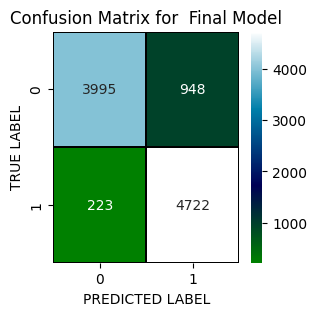

In [147]:
# Lets plot confusion matrix for  FinalModel
cm = confusion_matrix(Y_test,pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="ocean",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Final Model')
plt.show()

# Plotting ROC-AUC Curve

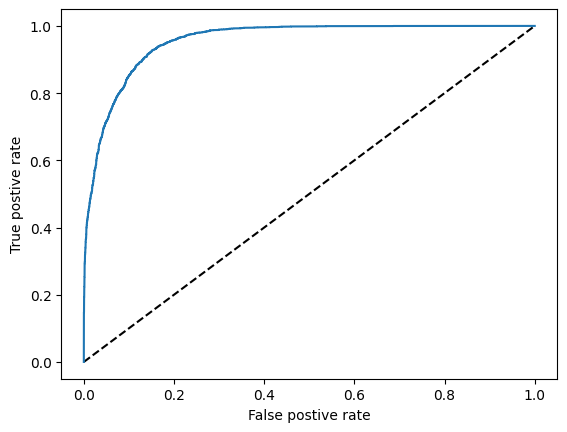

Auc Score :
 0.8815587894106056


In [150]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob = Census_Income.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test,y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='extra Trees Classifier')
plt.xlabel('False postive rate')
plt.ylabel('True postive rate')
plt.show()
auc_score = roc_auc_score(Y_test, Census_Income.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

# Saving the Model

In [151]:
import joblib
joblib.dump(Census_Income,"Prediction_of_Census_Income.pkl")

['Prediction_of_Census_Income.pkl']

# Predicting the saved model

In [153]:
# Loading the saved model
model=joblib.load("Prediction_of_Census_Income.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [154]:
pd.DataFrame([model.predict(X_test)[:],Y_test[:]],index=["Predicted","Original"]).T


,Predicted,Original
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
9883,0,0
9884,1,1
9885,1,0
9886,1,1
